### Prepeocessing  Dataset

In [151]:
#import Library of python
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import datetime 
import logging
sys.path.append('../src')
import warnings
warnings.filterwarnings('ignore')
from file_handler import FileHandler
from clean_data import data_preProcessing_script
from visualize_data import visualize
from cleaner import DataCleaner
File_handler=FileHandler()

In [52]:
# The load the raw sales data
data_path = 'data/train.csv'
version = 'v3'
repo = '../'

train_df = File_handler.dvc_get_data(data_path, version, repo)

# Finally load the test data
data_path2 = 'data/test.csv'
version = 'v5'
test_df = File_handler.dvc_get_data(data_path2, version, repo)

# Finally load the test data
data_path3 = 'data/store.csv'
version = 'vs'
store_df = File_handler.dvc_get_data(data_path3, version, repo)

2022-09-09 10:27:25,015 — FileHandler — INFO — DVC: CSV file read with path: data/train.csv | version: v3 | from: ../
2022-09-09 10:27:25,113 — FileHandler — INFO — DVC: CSV file read with path: data/test.csv | version: v5 | from: ../
2022-09-09 10:27:25,172 — FileHandler — INFO — DVC: CSV file read with path: data/store.csv | version: vs | from: ../


Visualize the Dataset

In [53]:
#train data
train_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [54]:
#test data
test_df.head(10)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


In [55]:
#store data
store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [56]:

preprocess_store = data_preProcessing_script(store_df)
preprocess_store.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


##### Missing value handle

In [57]:
preprocess_store.colums_WithMissingValue()

['CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [58]:
preprocess_store.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
StoreType,0,0.0 %
Assortment,0,0.0 %
CompetitionDistance,3,0.27 %
CompetitionOpenSinceMonth,354,31.75 %
CompetitionOpenSinceYear,354,31.75 %
Promo2,0,0.0 %
Promo2SinceWeek,544,48.79 %
Promo2SinceYear,544,48.79 %
PromoInterval,544,48.79 %


In [59]:
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median(), inplace = True)
store_df.Promo2SinceWeek.fillna(0,inplace=True)
store_df.Promo2SinceYear.fillna(0,inplace=True)
store_df.PromoInterval.fillna(0,inplace=True)
store_df.CompetitionOpenSinceMonth.fillna(0, inplace = True)
store_df.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [60]:
#change data format
train_df.Date = pd.to_datetime(train_df["Date"])
test_df.Date = pd.to_datetime(test_df["Date"])

In [61]:
train_data_cleaner = DataCleaner(train_df)
test_data_cleaner = DataCleaner(test_df)
store_data_cleaner = DataCleaner(store_df)

In [62]:
preprocess_train = data_preProcessing_script(train_df)
test_df['Open'].fillna(test_df['Open'].median(), inplace = True)
preprocess_train.get_column_based_missing_percentage()

,total_missing_values,missing_percentage
Store,0,0.0 %
DayOfWeek,0,0.0 %
Date,0,0.0 %
Sales,0,0.0 %
Customers,0,0.0 %
Open,0,0.0 %
Promo,0,0.0 %
StateHoliday,0,0.0 %
SchoolHoliday,0,0.0 %


##### Store Data Outliers

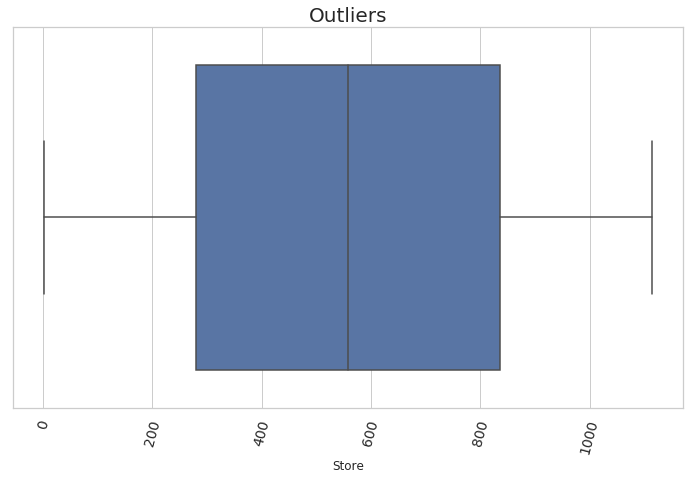

In [63]:
visualize.plot_box(store_df, 'Store', 'Outliers')

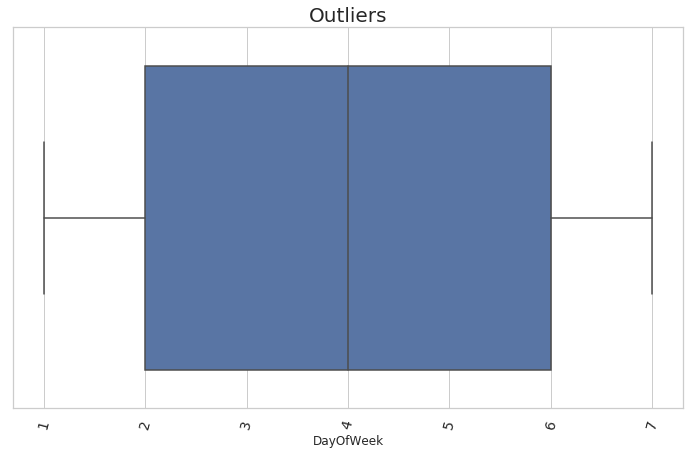

In [64]:
visualize.plot_box(test_df, 'DayOfWeek', 'Outliers')

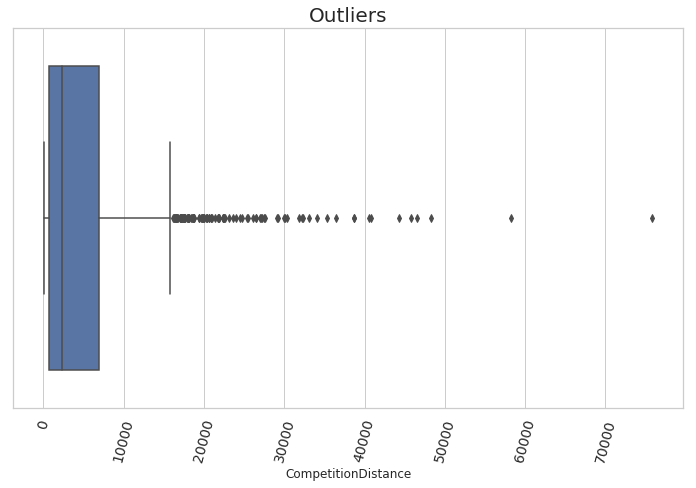

In [65]:
visualize.plot_box(store_df, 'CompetitionDistance', 'Outliers')

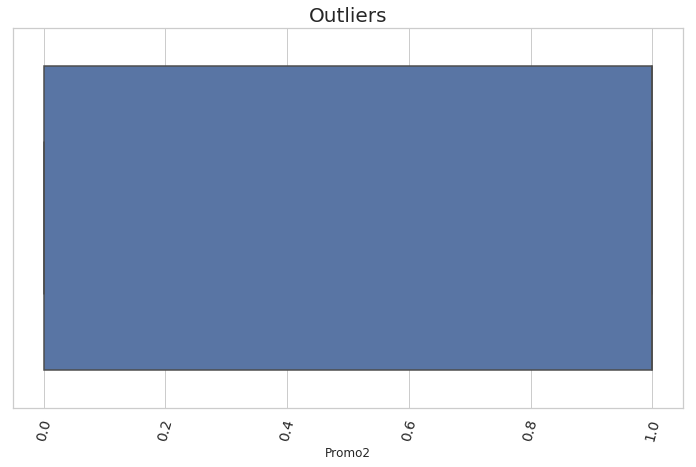

In [66]:
visualize.plot_box(store_df, 'Promo2', 'Outliers')

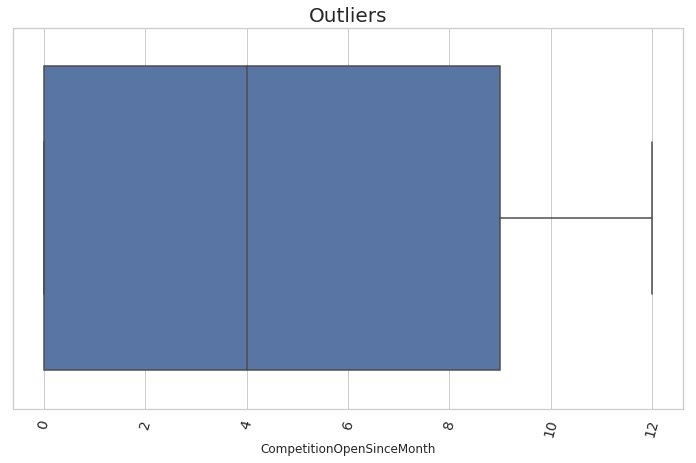

In [67]:
visualize.plot_box(store_df, 'CompetitionOpenSinceMonth', 'Outliers')

###### Train Data Fixing Outliers

In [68]:
train_data_cleaner.replace_outlier_with_median(train_df, 'Sales')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263.0,555,1,1,0,1
1,2,5,2015-07-31,6064.0,625,1,1,0,1
2,3,5,2015-07-31,8314.0,821,1,1,0,1
3,4,5,2015-07-31,13995.0,1498,1,1,0,1
4,5,5,2015-07-31,4822.0,559,1,1,0,1
5,6,5,2015-07-31,5651.0,589,1,1,0,1
6,7,5,2015-07-31,5744.0,1414,1,1,0,1
7,8,5,2015-07-31,8492.0,833,1,1,0,1
8,9,5,2015-07-31,8565.0,687,1,1,0,1
9,10,5,2015-07-31,7185.0,681,1,1,0,1


##### replace outlier with median

In [69]:
train_data_cleaner.replace_outlier_with_median(store_df, 'CompetitionDistance')
train_data_cleaner.replace_outlier_with_median(store_df, 'CompetitionOpenSinceMonth')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,2325.0,4.0,2015.0,0,0.0,0.0,0
5,6,a,a,310.0,12.0,2013.0,0,0.0,0.0,0
6,7,a,c,2325.0,4.0,2013.0,0,0.0,0.0,0
7,8,a,a,7520.0,10.0,2014.0,0,0.0,0.0,0
8,9,a,c,2030.0,8.0,2000.0,0,0.0,0.0,0
9,10,a,a,3160.0,9.0,2009.0,0,0.0,0.0,0


##### Merging the train and test with store

In [70]:
train_store_data=pd.merge(train_df, store_df, on='Store', how='inner') # training dataset with the store dataset
test_store_data=pd.merge(test_df, store_df, on='Store', how='inner')  #test dataset with the store dataset

#### Save Preprocessesed Data

In [71]:
train_store_data.to_csv('../data/train_store.csv', index=False)
test_store_data.to_csv('../data/test_store.csv', index=False)

#### Preprocess the merged train and store data

Load preprocessed data

In [123]:
# The load the preprocess data
data_path= 'data/train_store.csv'
version = 'vts1'
repo = '../'

train_store_df = File_handler.dvc_get_data(data_path, version, repo)

# Finally load the test data
data_path = 'data/test_store.csv'
version = 'vts2'
test_store_df = File_handler.dvc_get_data(data_path, version, repo)


2022-09-09 11:03:27,554 — FileHandler — INFO — DVC: CSV file read with path: data/train_store.csv | version: vts1 | from: ../
2022-09-09 11:03:34,310 — FileHandler — INFO — DVC: CSV file read with path: data/test_store.csv | version: vts2 | from: ../


In [124]:
# getting the information
preprocess = data_preProcessing_script(train_store_df)
preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null object
Sales                        1017209 non-null float64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 non-null float64
Promo2                       1017209 non-null int64
Promo2SinceWeek              1017209 non-null float64
Promo2SinceYear              1017209 non-

In [125]:
# changeing date object to datetime type
train_store_df.Date = pd.to_datetime(train_store_df["Date"])
# object creation
train_store_cleaner = DataCleaner(train_store_df)
# separate date into day, month, year
train_store_cleaner.separate_date_column(date_column='Date')

preprocess.show_data_information()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 21 columns):
Store                        1017209 non-null int64
DayOfWeek                    1017209 non-null int64
Date                         1017209 non-null datetime64[ns]
Year                         1017209 non-null int64
Month                        1017209 non-null int64
Day                          1017209 non-null int64
Sales                        1017209 non-null float64
Customers                    1017209 non-null int64
Open                         1017209 non-null int64
Promo                        1017209 non-null int64
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null int64
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1017209 non-null float64
CompetitionOpenSinceMonth    1017209 non-null float64
CompetitionOpenSinceYear     1017209 

#### Filling Missing Values

In [126]:
# Filling Missing Values

train_store_df['CompetitionDistance'].fillna(train_store_df['CompetitionDistance'].median(), inplace = True)
train_store_df['CompetitionOpenSinceMonth'].fillna(train_store_df['CompetitionOpenSinceMonth'].mode().iloc[0], inplace = True)
train_store_df['CompetitionOpenSinceYear'].fillna(train_store_df['CompetitionOpenSinceYear'].mode().iloc[0], inplace = True)
#promo two since week 
train_store_df['Promo2SinceWeek'].fillna(train_store_df['Promo2SinceWeek'].mode().iloc[0], inplace=True)
train_store_df['Promo2SinceYear'].fillna(train_store_df['Promo2SinceYear'].mode().iloc[0], inplace = True)
train_store_df['PromoInterval'].fillna(train_store_df['PromoInterval'].mode().iloc[0], inplace=True)
#error    

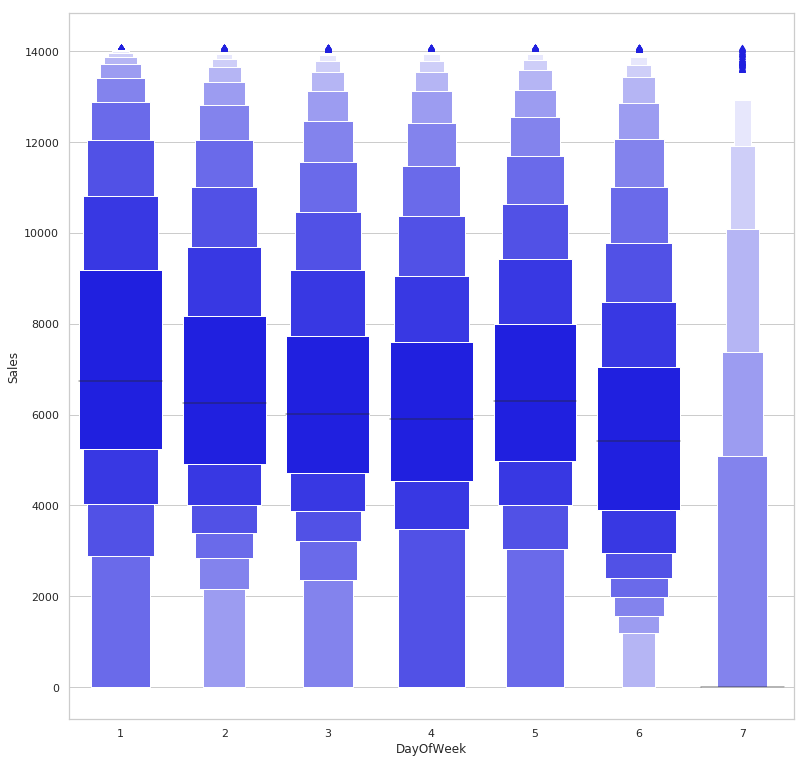

In [127]:
plt.figure(figsize=(13,13))
sns.set(style="whitegrid")
sns.boxenplot(data=train_store_df,scale="linear",x="DayOfWeek",y="Sales",color="blue")

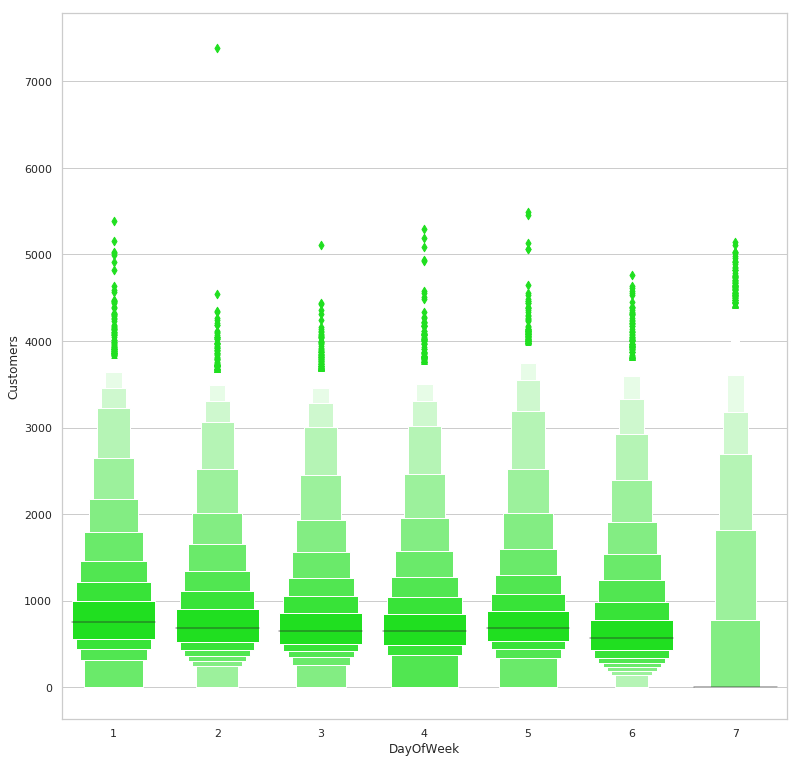

In [128]:
plt.figure(figsize=(13,13))
sns.set(style="whitegrid")
sns.boxenplot(y="Customers", x="DayOfWeek",data=train_df, scale="linear",color="lime")

In [130]:
#fill with missing median
train_store_cleaner = DataCleaner(train_store_df)
train_store_cleaner.replace_outlier_with_median(train_store_df, 'Customers')
train_store_cleaner.replace_outlier_with_median(train_store_df, 'Sales')

,Store,DayOfWeek,Date,Year,Month,Day,Sales,Customers,Open,Promo,...,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,2015,7,31,5263.0,555.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,2015,7,30,5020.0,546.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,2015,7,29,4782.0,523.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,2015,7,28,5011.0,560.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,2015,7,27,6102.0,612.0,1,1,...,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,2015-07-26,2015,7,26,0.0,0.0,0,0,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,2015,7,25,4364.0,500.0,1,0,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,2015,7,24,3706.0,459.0,1,0,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,2015,7,23,3769.0,503.0,1,0,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,2015,7,22,3464.0,463.0,1,0,...,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


#### Train Data Feature Extraction

In [131]:
# WeekDays
from clean_unlabel_data import Cleanunlabel
manu = Cleanunlabel(train_store_df)

In [132]:
# weekdays
manu.add_week_day('DayOfWeek')
# number of days to holydays
manu.add_number_of_days_to_holiday('StateHoliday')
# number of days after holydays
manu.add_number_of_days_after_holiday('StateHoliday')
# Beginning of month, mid month and ending of month
manu.add_month_timing('Day')

In [133]:
# Adding salespercustomer column
train_store_df['SalesPerCustomer']=train_store_df['Sales']/train_store_df['Customers']

In [134]:
# Since the competition variables CompetitionOpenSinceYear and CompeitionOpenSinceMonth have the same 
# underlying meaning, merging them into one variable
train_store_df['CompetitionOpenSince'] = np.where((train_store_df['CompetitionOpenSinceMonth']==0) & 
                                                  (train_store_df['CompetitionOpenSinceYear']==0) , 0,
                                                  (train_store_df.Month - train_store_df.CompetitionOpenSinceMonth) 
                                                  + (12 * (train_store_df.Year - train_store_df.CompetitionOpenSinceYear)))

In [135]:
# Adding Season
manu.add_season('Month')

#### Save Train unlabeled dataset

In [136]:
train_store_df.to_csv('../data/train_store_unlabel.csv', index=False)

#### Labeling Object Columns

In [85]:

train_store_df['StateHoliday'] = train_store_df['StateHoliday'].apply(lambda x: 'o' if x == '0' else x)
train_store_df['StateHoliday'] = train_store_df['StateHoliday'].apply(lambda x: 'o' if x == 0 else x)

In [137]:
# Converting catagorical variables with label
manu.label_columns(['Season', 'StoreType', 'Assortment', 'StateHoliday', 'PromoInterval'])

{'Season': LabelEncoder(),
 'StoreType': LabelEncoder(),
 'Assortment': LabelEncoder(),
 'StateHoliday': LabelEncoder(),
 'PromoInterval': LabelEncoder()}

Conversion of types

In [138]:
train_store_df['CompetitionOpenSinceMonth'] = train_store_df['CompetitionOpenSinceMonth'].astype(int)
train_store_df['CompetitionOpenSinceYear'] = train_store_df['CompetitionOpenSinceYear'].astype(int)
train_store_df['Promo2SinceWeek'] = train_store_df['Promo2SinceWeek'].astype(int)
train_store_df['Promo2SinceYear'] = train_store_df['Promo2SinceYear'].astype(int)
train_store_df['CompetitionOpenSince'] = train_store_df['CompetitionOpenSince'].astype(int)

In [140]:
train_store_df['Sales'] = train_store_df['Sales'].astype(int)
train_store_df['Customers'] = train_store_df['Customers'].astype(int)

Scaling Data

In [144]:
# Store Date Customers
train_store_df.drop(['Store','Date','CompetitionDistance','SalesPerCustomer'],axis=1,inplace=True)

In [146]:
train_store_df.dtypes

DayOfWeek                    int64
WeekDay                      int64
Year                         int64
Month                        int64
Season                       int64
Day                          int64
MonthTiming                  int64
Sales                        int64
Customers                    int64
Open                         int64
Promo                        int64
StateHoliday                 int64
DaysAfterHoliday             int64
DaysToHoliday                int64
SchoolHoliday                int64
StoreType                    int64
Assortment                   int64
CompetitionOpenSinceMonth    int64
CompetitionOpenSinceYear     int64
Promo2                       int64
Promo2SinceWeek              int64
Promo2SinceYear              int64
PromoInterval                int64
CompetitionOpenSince         int64
dtype: object

In [164]:
# Using StandardScaler to standardize the all columns
scale_list = train_store_df.columns.tolist()
manu.standardize_columns(scale_list)

,DayOfWeek,WeekDay,Year,Month,Season,Day,MonthTiming,Sales,Customers,Open,...,SchoolHoliday,StoreType,Assortment,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,CompetitionOpenSince
0,0.501484,0.630672,1.502077,0.346724,0.389712,1.740766,1.205894,-0.044585,-0.043338,0.452399,...,2.144211,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
1,0.000831,0.630672,1.502077,0.346724,0.389712,1.626969,1.205894,-0.119598,-0.070045,0.452399,...,2.144211,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
2,-0.499823,0.630672,1.502077,0.346724,0.389712,1.513173,1.205894,-0.193067,-0.138295,0.452399,...,2.144211,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
3,-1.000476,0.630672,1.502077,0.346724,0.389712,1.399377,1.205894,-0.122376,-0.028501,0.452399,...,2.144211,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
4,-1.501129,0.630672,1.502077,0.346724,0.389712,1.285581,1.205894,0.214408,0.125805,0.452399,...,2.144211,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
5,1.502791,-1.585611,1.502077,0.346724,0.389712,1.171784,1.205894,-1.669237,-1.690259,-2.210440,...,-0.466372,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
6,1.002138,-1.585611,1.502077,0.346724,0.389712,1.057988,1.205894,-0.322100,-0.206546,0.452399,...,-0.466372,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
7,0.501484,0.630672,1.502077,0.346724,0.389712,0.944192,1.205894,-0.525220,-0.328211,0.452399,...,-0.466372,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
8,0.000831,0.630672,1.502077,0.346724,0.389712,0.830395,1.205894,-0.505773,-0.197644,0.452399,...,-0.466372,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805
9,-0.499823,0.630672,1.502077,0.346724,0.389712,0.716599,1.205894,-0.599924,-0.316341,0.452399,...,-0.466372,0.580451,-0.940975,0.950877,0.681904,-1.001128,-0.760097,-1.001128,-0.906156,0.618805


Saving scaled / label version data

In [166]:
train_store_df.to_csv('../data/train_store_label.csv', index=False)

==============Labeled Data for machine train================